In [1]:
import pandas as pd
import pickle

In [2]:
import mlflow


mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("nyc-taxi-homework")

<Experiment: artifact_location='./mlruns/3', experiment_id='3', lifecycle_stage='active', name='nyc-taxi-homework', tags={}>

## Q1. Install MLflow

In [3]:
mlflow.__version__

'1.26.1'

## Q2. Download and preprocess the data

Use the script preprocess_data.py located in the folder homework to preprocess the data.

The script will:
- load the data from the folder <TAXI_DATA_FOLDER> (the folder where you have downloaded the data),
- fit a DictVectorizer on the training set (January 2021 data),
- save the preprocessed datasets and the model to disk

But before go to 02-experiment-tracking/homework/ folder before executing the command and change the value of <TAXI_DATA_FOLDER> to the location where you saved the data:
<br>
```<br>
cd /Users/katush/mlops-zoomcamp/02-experiment-tracking/homework

python preprocess_data.py --raw_data_path /Users/katush/mlops-zoomcamp/notebooks/data --dest_path /Users/katush/mlops-zoomcamp/notebooks/output
```

In [4]:
TAXI_DATA_FOLDER = '/Users/katush/mlops-zoomcamp/notebooks/data'

How many files were saved to `OUTPUT_FOLDER`:

In [5]:
!ls ./output

dv.pkl    test.pkl  train.pkl valid.pkl


## Q3. Train a model with autolog

Edit prepared the training script `train.py`, which also is in the folder `homework`.

The script will load the datasets produced by the previous step in `./output`, train the model on the training set and finally calculate the RMSE on the validation set.

The modified script should enable autologging with MLflow. The script is runned by command:

```
cd ./prepared_scripts

python train.py --data_path ./output
```

_How many parameters are automatically logged by MLflow? - **17**_
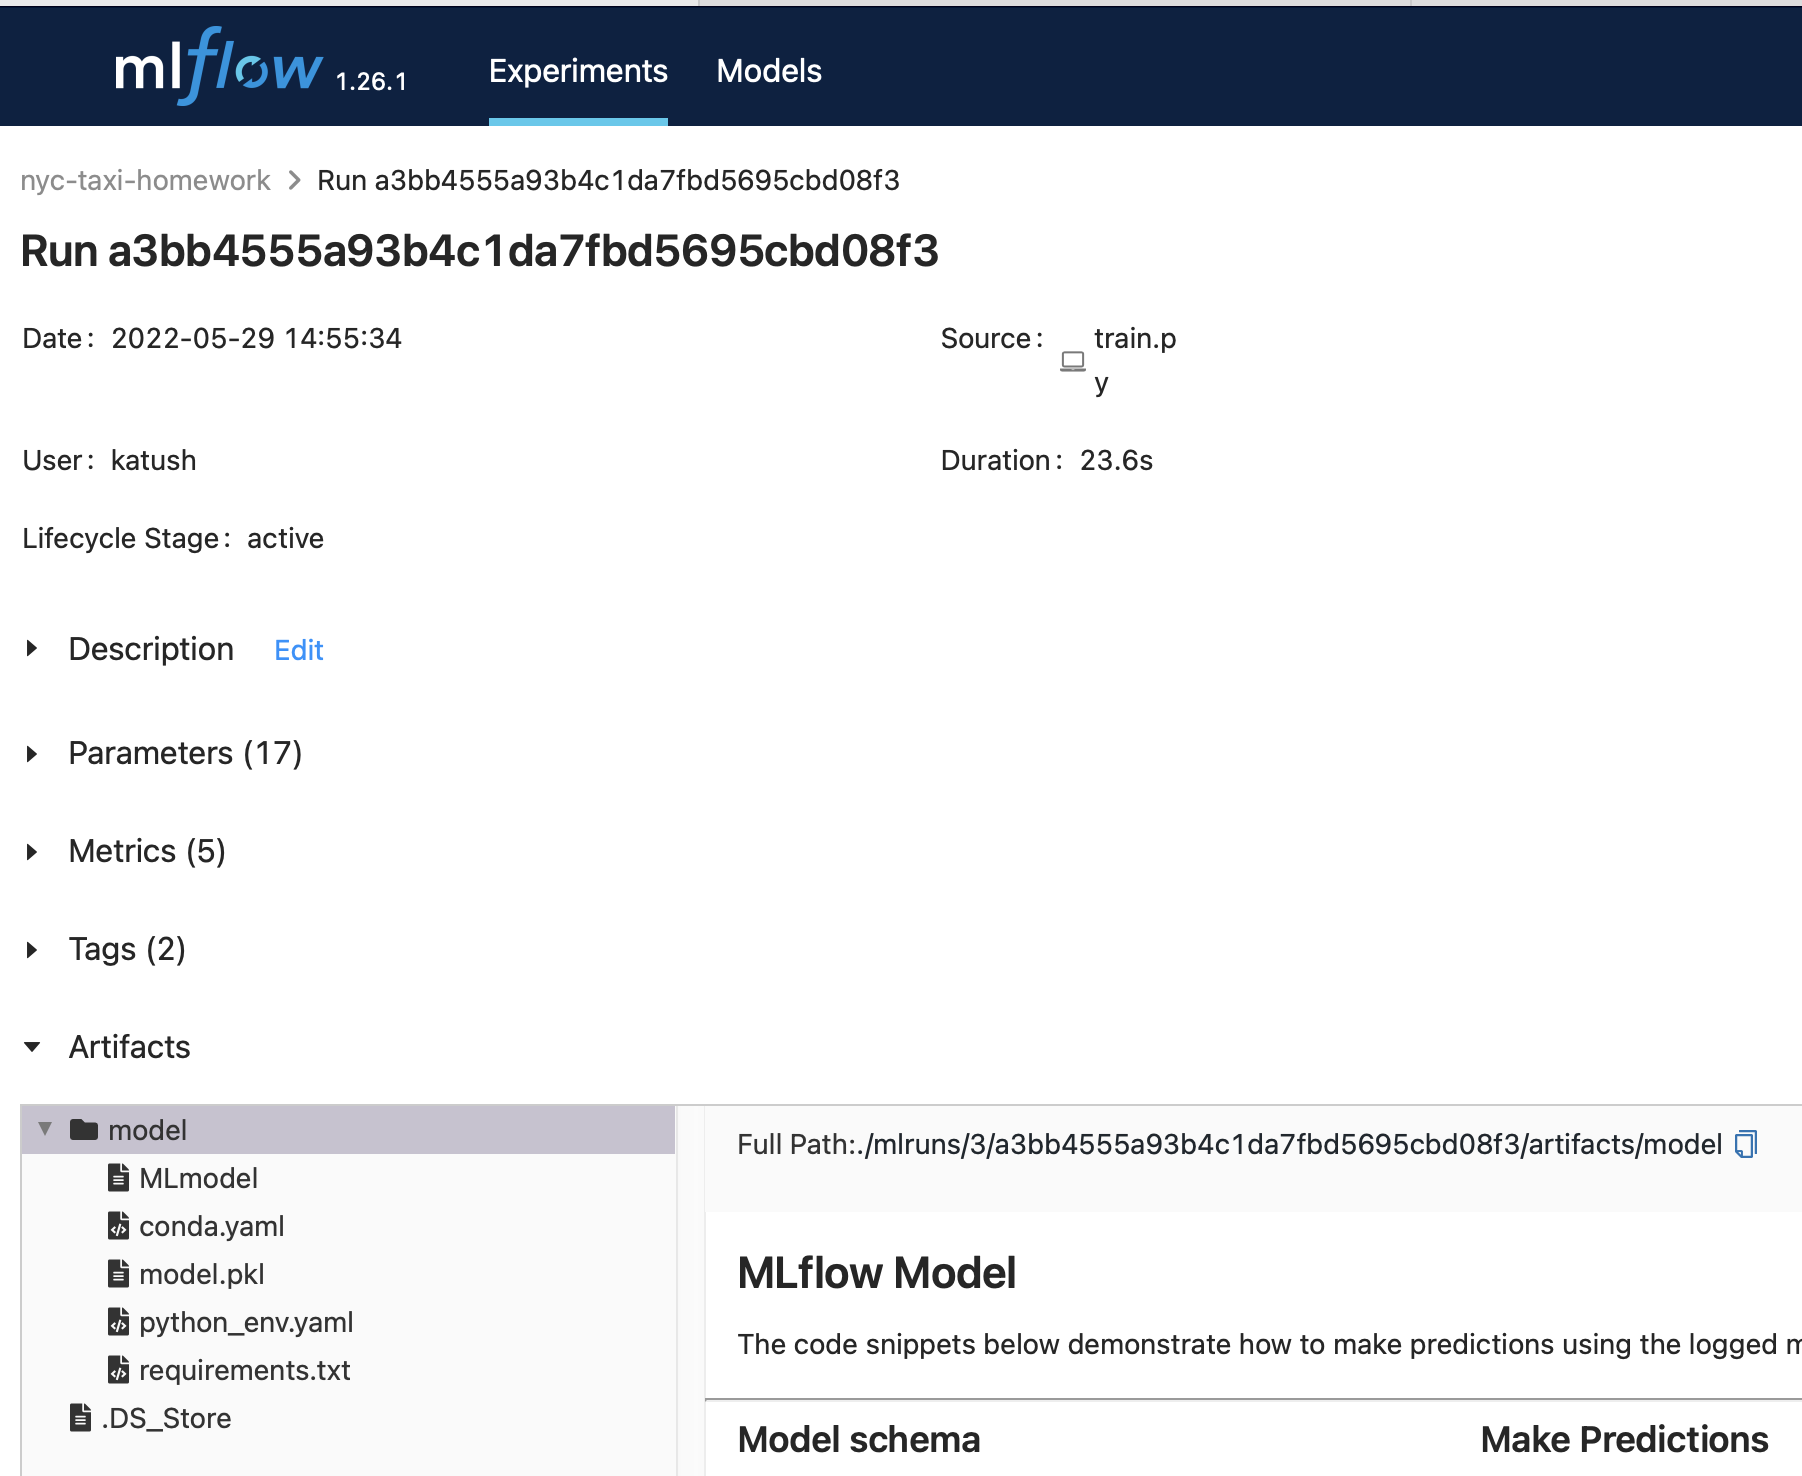

## Q4. Launch the tracking server locally

We want to manage the entire lifecycle of our ML model. In this step, you'll need to launch a tracking server. This way we will also have access to the model registry.

Your task is to
- launch the tracking server on your local machine
- select a SQLite db for the backend store and a folder called artifacts for the artifacts store
You should keep the tracking server running to work on the next two exercises that use the server.

_In addition to backend-store-uri, what else do you need to pass to properly configure the server? - **default-artifact-root**_

## Q5. Tune the hyperparameters of the model

Now let's try to reduce the validation error by tuning the hyperparameters of the random forest regressor using hyperopt.

We have prepared the script hpo.py for this exercise.

Your task is to modify the script hpo.py and make sure that the validation RMSE is logged to MLflow for each run of the hyperparameter optimization (you will need to add a few lines of code to the objective function) and run the script without passing any parameters.

After that, open the MLflow UI and explore the runs from the experiment called random-forest-hyperopt to answer the question below.

Important: don't use autologging for this exercise.

The idea is to just log the information that you need to answer the question below, including:

the list of hyperparameters that are passed to the objective function during the optimization.
the RMSE obtained on the validation set (February 2021 data).

_What's the best validation RMSE that you got? - **6.628**_

```

python hpo.py
```

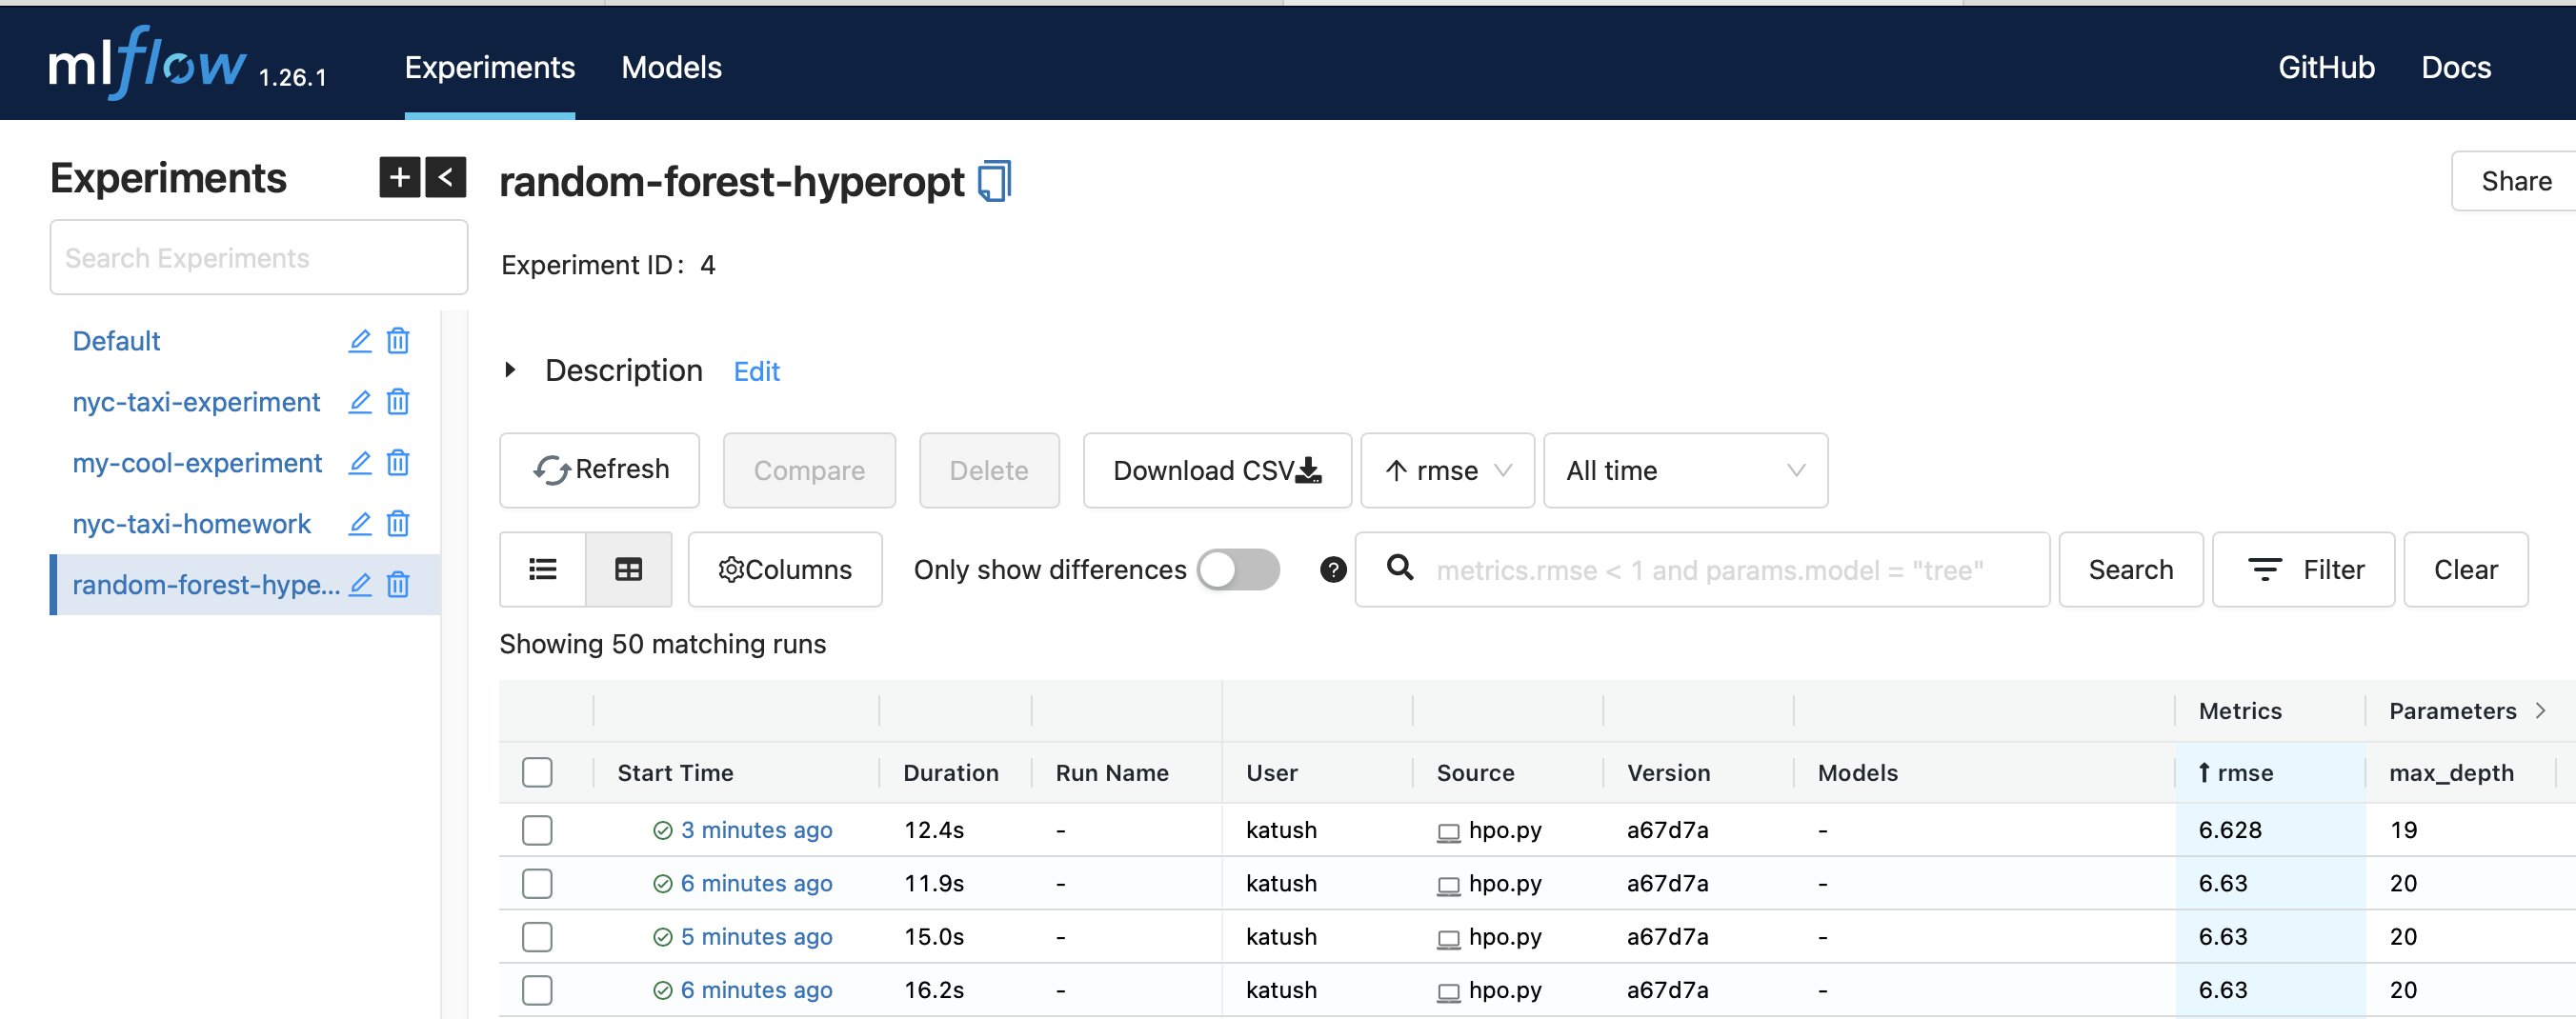

## Q6. Promote the best model to the model registry

The results from the hyperparameter optimization are quite good so we can assume that we are ready to test some of these models in production. In this exercise, you'll promote the best model to the model registry. We have prepared a script called register_model.py, which will check the results from the previous step and select the top 5 runs. After that, it will calculate the RMSE of those models on the test set (March 2021 data) and save the results to a new experiment called random-forest-best-models.

Your task is to update the script register_model.py so that it selects the model with the lowest RMSE on the test set and registers it to the model registry.

Tip 1: you can use the method search_runs from the MlflowClient to get the model with the lowest RMSE. Tip 2: to register the model you can use the method mlflow.register_model and you will need to pass the right model_uri in the form of a string that looks like this: "runs:/<RUN_ID>/model", and the name of the model (make sure to choose a good one!).

_What is the test RMSE of the best model? - **6.55**_

```
python register_model.py
```
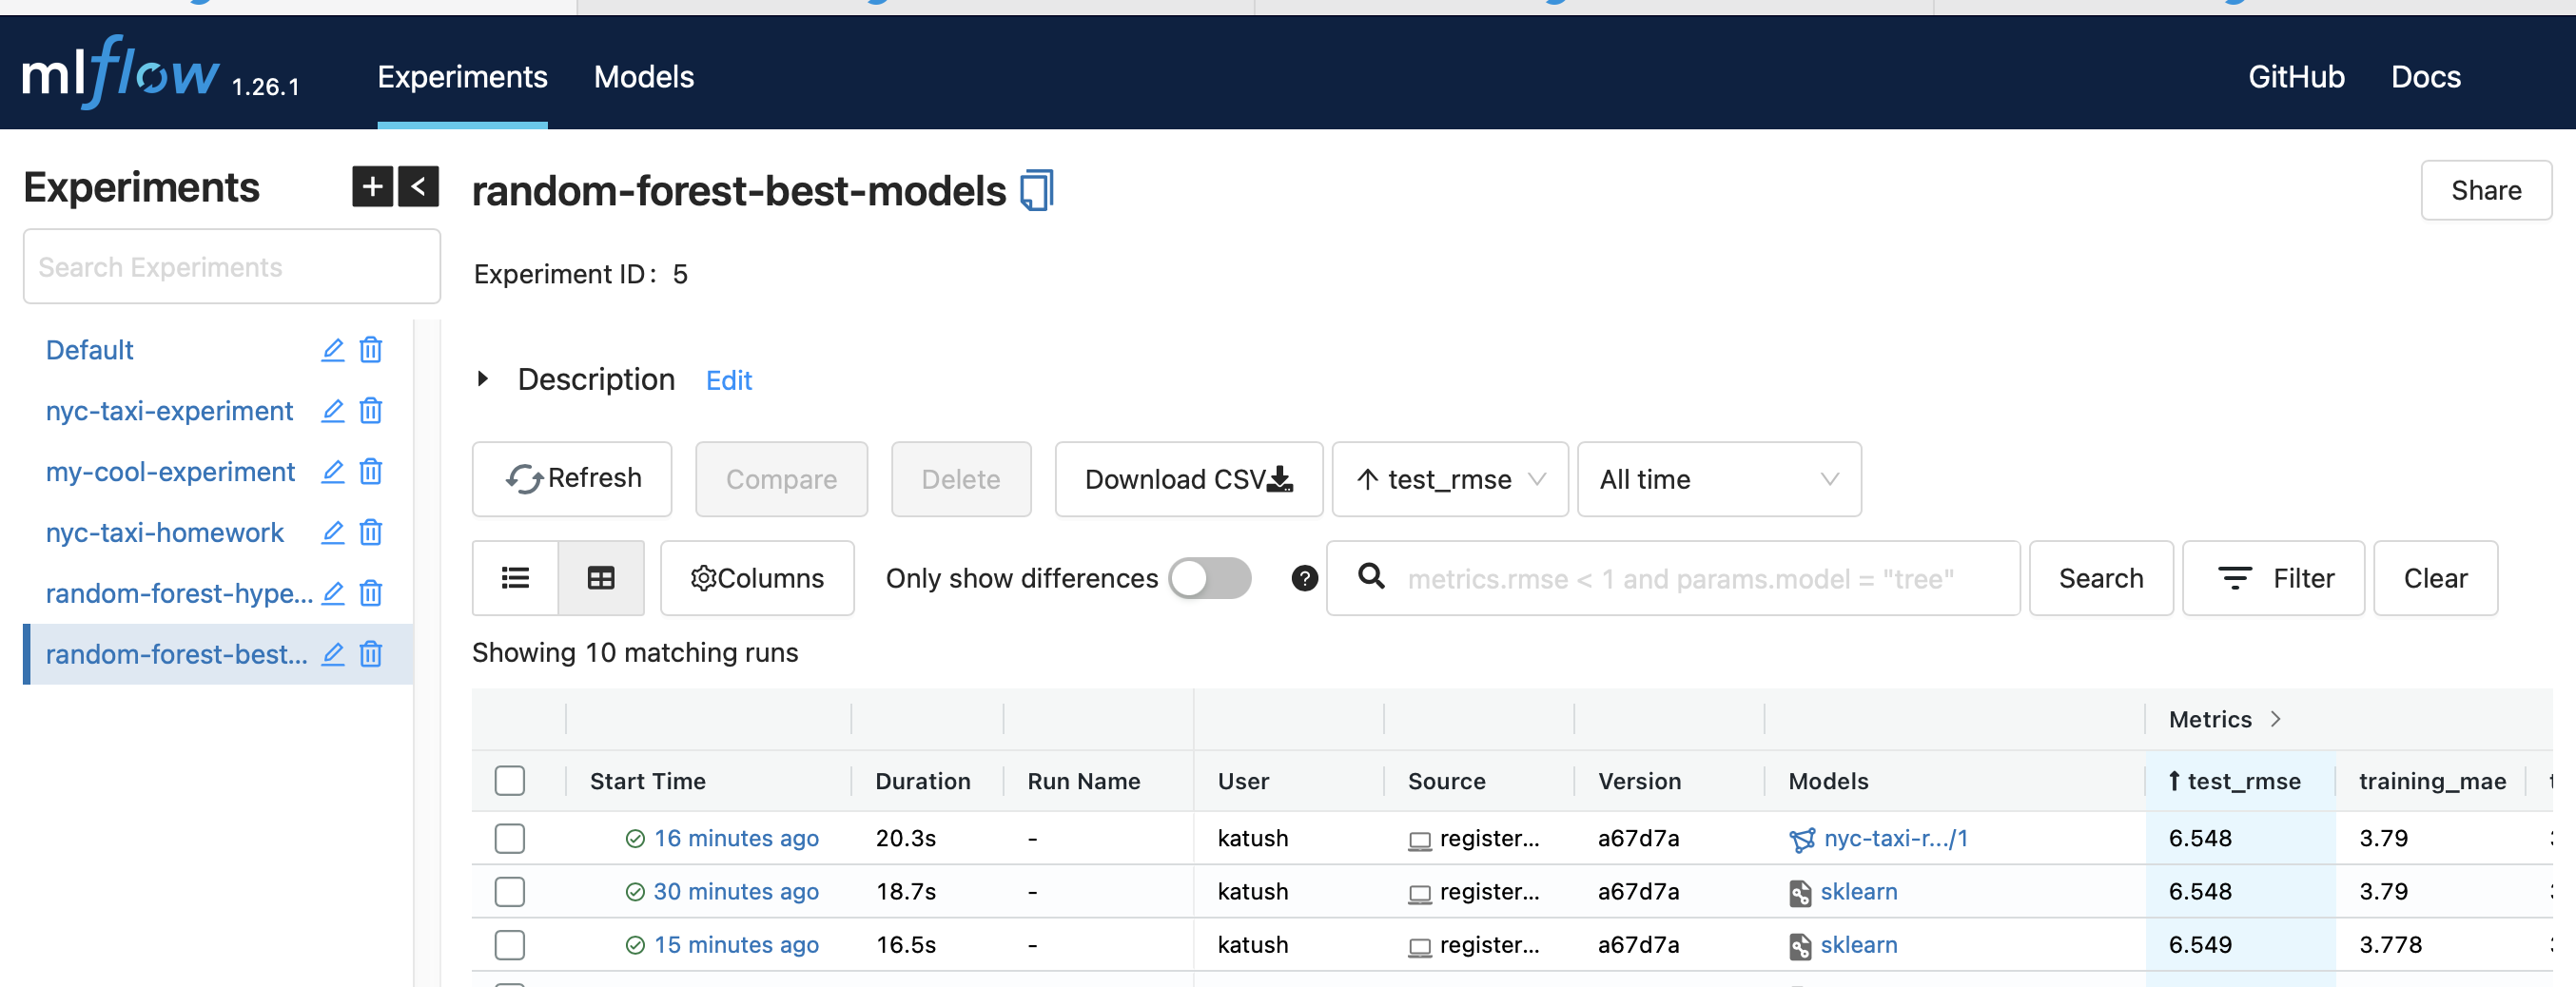